In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd

iris_df  = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'viginica'

target_df['species'] = target_df['species'].apply(converter)
iris_df = pd.concat([iris_df, target_df], axis=1)

iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/tmp/ipykernel_32953/790619682.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


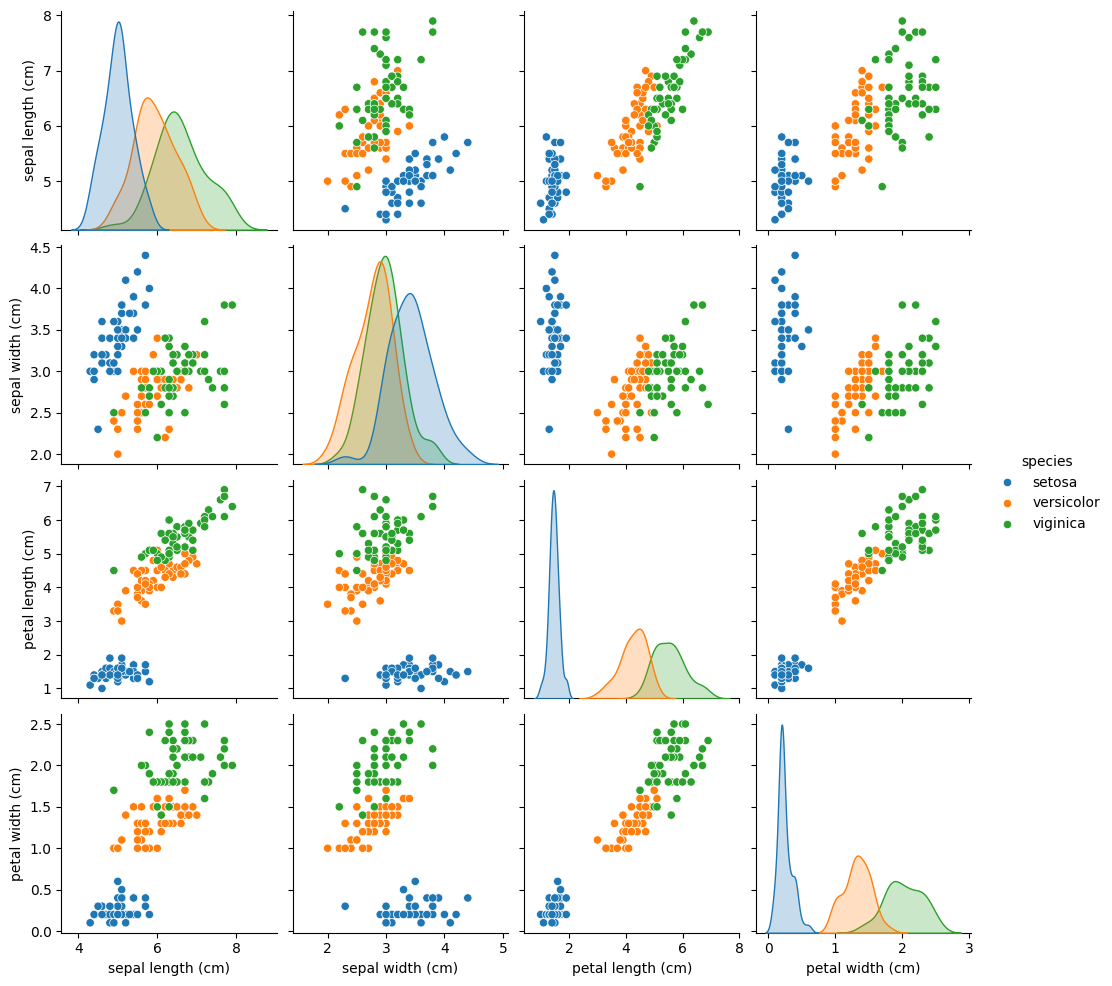

In [3]:
import seaborn as sns

sns.pairplot(iris_df, hue='species')

In [4]:
iris_df.drop('species', axis=1, inplace=True)
target_df = pd.DataFrame(columns=['species'], data=iris.target)
iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X = iris_df.drop(labels="sepal length (cm)", axis=1)
y = iris_df['sepal length (cm)']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))

Mean Absolute Error: 0.2595570975563035
Mean Squared Error: 0.10174529564238954


In [12]:
d = {'sepal length (cm)' : [4.6],
    'sepal width (cm)' : [3.4],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.3],
    'species' : 0}
test_df = pd.DataFrame(data=d)
X_test = test_df.drop("sepal length (cm)", axis=1)
y_test = test_df["sepal length (cm)"]
pred = lr.predict(X_test)

In [13]:
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

Predicted Sepal Length (cm): 4.887499211502661
Actual Sepal Length (cm): 4.6
